In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data = np.array(data)
m, n = data.shape

np.random.shuffle(data)

data_dev = data[1:1000].T
x_dev = data_dev[1:n]
y_dev = data_dev[0]

data_train = data[1000:m].T
x_train = data_train[1:n]
x_train = x_train/255.
y_train = data_train[0]

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [5]:
def ReLU(Z):
    return np.maximum(0, Z)

In [6]:
def Softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [7]:
def forward(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1, A1, Z2, A2

In [8]:
def onehot_encode_Y(Y):
    Y_encode = np.zeros((Y.size, Y.max()+1))
    Y_encode[np.arange(Y.size), Y] = 1
    Y_encode = Y_encode.T
    return Y_encode

In [9]:
def derivReLU(Z):
    return Z>0

In [10]:
def backprop(Z1, W1, A1, Z2, W2, A2, X, Y):
    one_hot_Y = onehot_encode_Y(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2    

In [11]:
def update_param(W1, W2, b1, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y)/Y.size

In [14]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backprop(Z1, W1, A1, Z2, W2, A2, X, Y)
        W1, b1, W2, b2 = update_param(W1, W2, b1, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [15]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.1, 500)

Iteration:  0
[1 5 5 ... 0 3 3] [8 0 3 ... 6 6 9]
0.10051219512195123
Iteration:  10
[1 0 5 ... 0 3 3] [8 0 3 ... 6 6 9]
0.26663414634146343
Iteration:  20
[1 0 0 ... 0 3 3] [8 0 3 ... 6 6 9]
0.34468292682926827
Iteration:  30
[1 0 0 ... 0 9 9] [8 0 3 ... 6 6 9]
0.4064390243902439
Iteration:  40
[1 0 0 ... 0 9 9] [8 0 3 ... 6 6 9]
0.4622926829268293
Iteration:  50
[1 0 0 ... 0 4 9] [8 0 3 ... 6 6 9]
0.5104634146341464
Iteration:  60
[1 0 0 ... 0 4 9] [8 0 3 ... 6 6 9]
0.5510487804878049
Iteration:  70
[1 0 3 ... 0 4 9] [8 0 3 ... 6 6 9]
0.5853170731707317
Iteration:  80
[1 0 3 ... 0 4 9] [8 0 3 ... 6 6 9]
0.616
Iteration:  90
[1 0 3 ... 0 4 9] [8 0 3 ... 6 6 9]
0.6420487804878049
Iteration:  100
[1 0 3 ... 0 6 9] [8 0 3 ... 6 6 9]
0.6635365853658537
Iteration:  110
[1 0 3 ... 0 6 9] [8 0 3 ... 6 6 9]
0.6835121951219513
Iteration:  120
[1 0 3 ... 0 6 9] [8 0 3 ... 6 6 9]
0.6988780487804878
Iteration:  130
[1 0 3 ... 0 6 9] [8 0 3 ... 6 6 9]
0.7137073170731707
Iteration:  140
[1 0 3 ... 

In [29]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


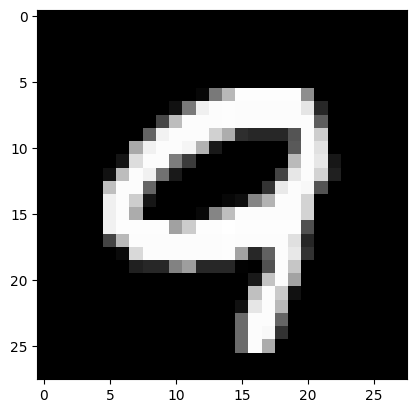

Prediction:  [9]
Label:  9


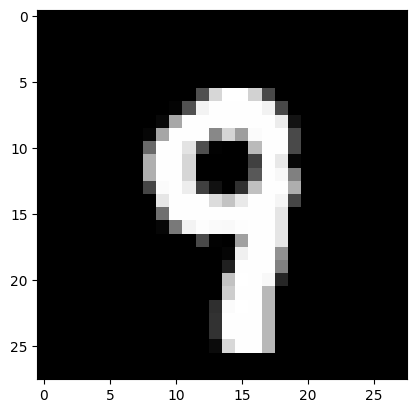

Prediction:  [5]
Label:  8


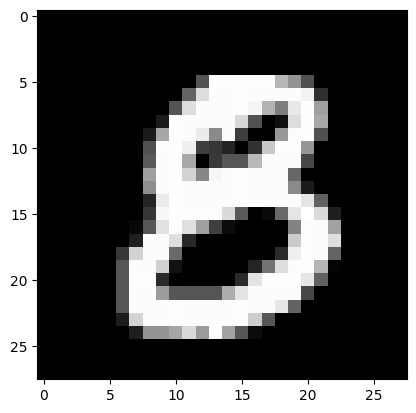

Prediction:  [1]
Label:  1


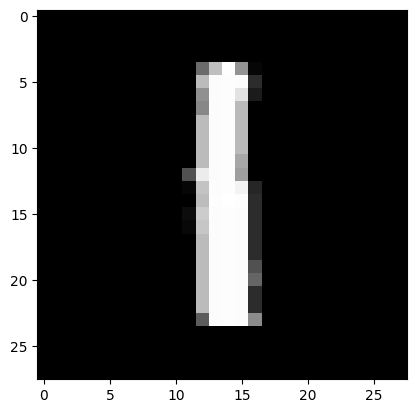

In [32]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)